In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from solar_optimization.core import *#TimeSeriesConfig, BaseConsumption, ConsumptionPeak, SolarProduction, SolarProductionPeak, Scenario, ScenarioInputs
from solar_optimization.devices.cet import CETProperties
from solar_optimization.strategies import *#ScheduledStrategy, SolarOnlyStrategy, MaximizeSolarStrategy, OptimizationStrategy
from solar_optimization.visualization.plotter import *#SolarOptimizationVisualizer, ScenarioDataVisualiser

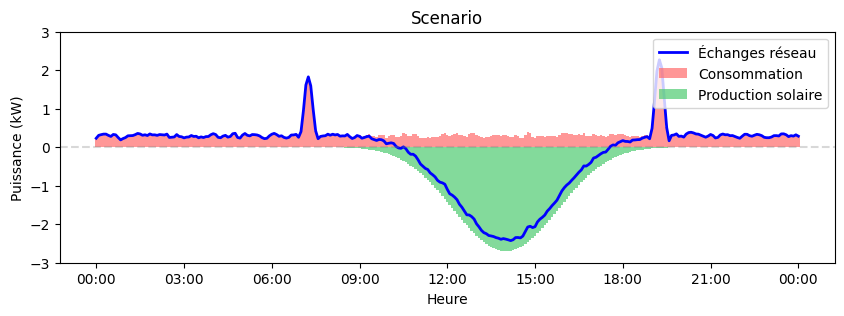

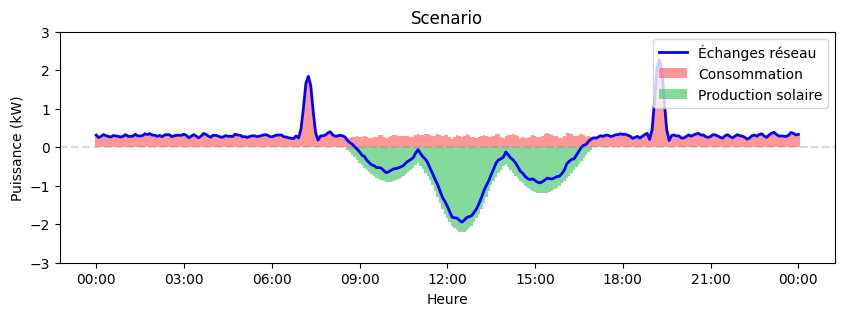

In [2]:
## Generate the scenario
# Timestamps
time_resolution = 5 #minutes
timestamps = TimeSeriesConfig.create_timestamps(time_delta=timedelta(minutes=time_resolution))
## Data generation
# ConsumptionScenarios: WEEK_DAY / WEEKEND_DAY
# ProductionScenarios: SUMMER_SUNNY_ALL_DAY / SUMMER_CLOUDY / WINTER_SUNNY_ALL_DAY / WINTER_CLOUDY
scenario_week_day_summer_sunny = Scenario(ScenarioInputs(timestamps, 
                                   DefaultBaseConsumption.generate(DefaultConsumptionScenario.WEEK_DAY), 
                                   DefaultSolarProduction.generate(DefaultProductionScenario.SUMMER_SUNNY_ALL_DAY)))
scenario_week_day_summer_cloudy = Scenario(ScenarioInputs(timestamps, 
                                   DefaultBaseConsumption.generate(DefaultConsumptionScenario.WEEK_DAY), 
                                   DefaultSolarProduction.generate(DefaultProductionScenario.SUMMER_CLOUDY)))
ScenarioDataVisualiser.plot_scenario(scenario_week_day_summer_sunny)
ScenarioDataVisualiser.plot_scenario(scenario_week_day_summer_cloudy)
scenario = scenario_week_day_summer_cloudy

In [3]:
## Strategies configuration
strategies = [
    ScheduledStrategy(
        "Night scheduling", [
        {"start": datetime(2024, 1, 1, 0, 0), "end": datetime(2024, 1, 1, 2, 0)},
        {"start": datetime(2024, 1, 1, 22, 0),"end": datetime(2024, 1, 2, 0, 0)}
    ]),
    ScheduledStrategy(
        "Day scheduling", [
        {"start": datetime(2024, 1, 1, 11, 0),
         "end": datetime(2024, 1, 1, 15, 0)}
    ]),
    SolarOnlyStrategy("100% Solar", threshold_start=1.1),
    MaximizeSolarStrategy("Max. Solar."),
    OptimizationStrategy("Optimiz", threshold=0.5)
]
## Strategies evalutation of CET optimization
# CET properties
cet_properties = CETProperties(power=1, min_duration=timedelta(minutes=15), max_duration=timedelta(hours=4))

In [4]:
# Evaluate strategies and store results
results = {}
for strategy in strategies:
    # Run optimization for each strategy
    results[strategy.name] = strategy.run_optimization(scenario, cet_properties)


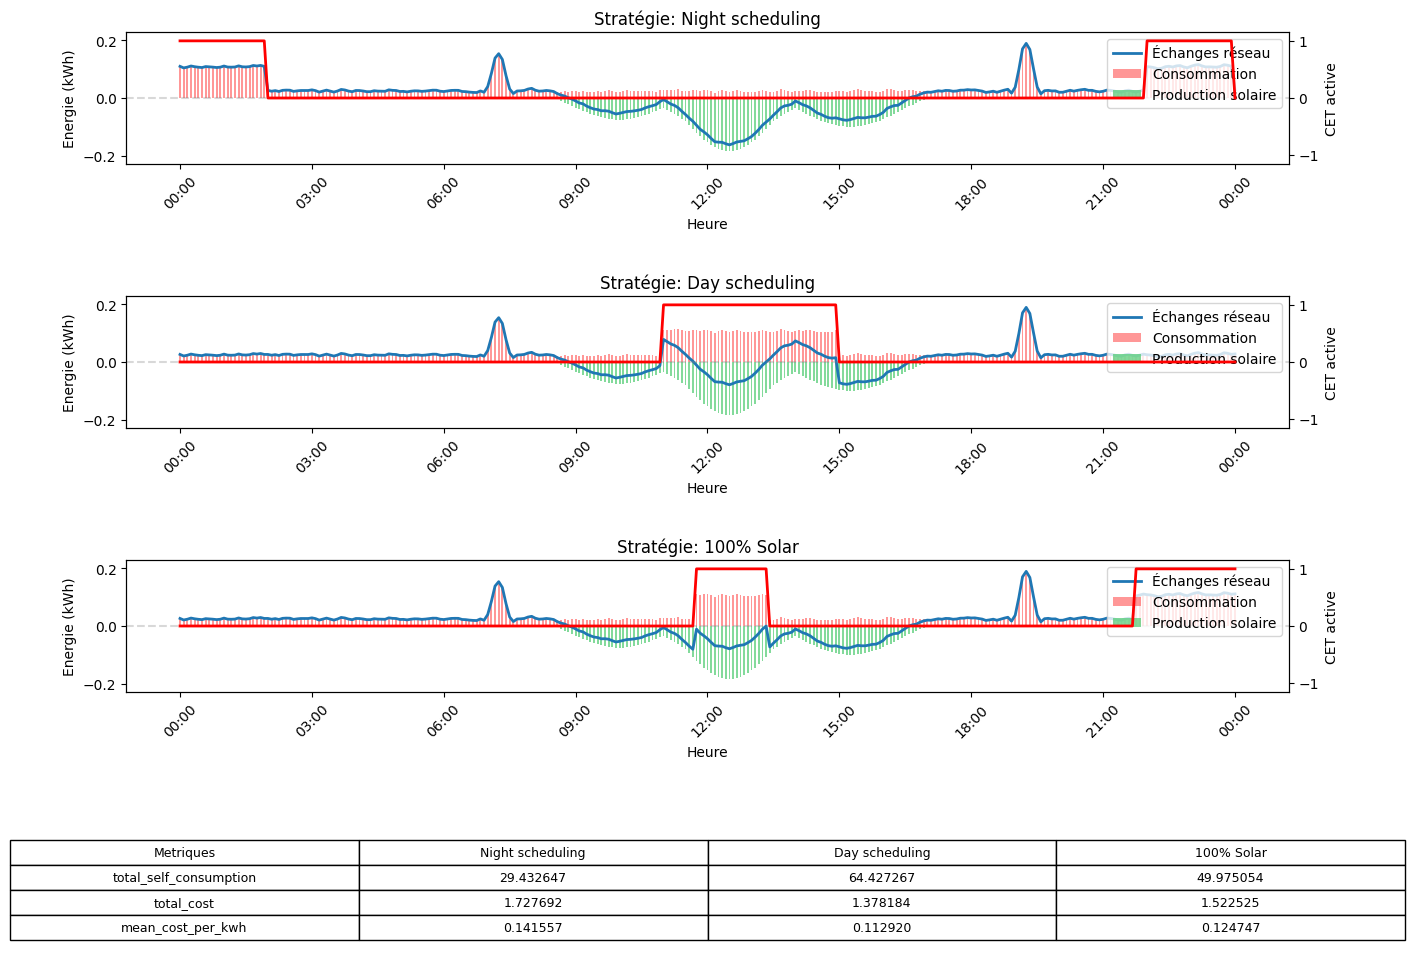

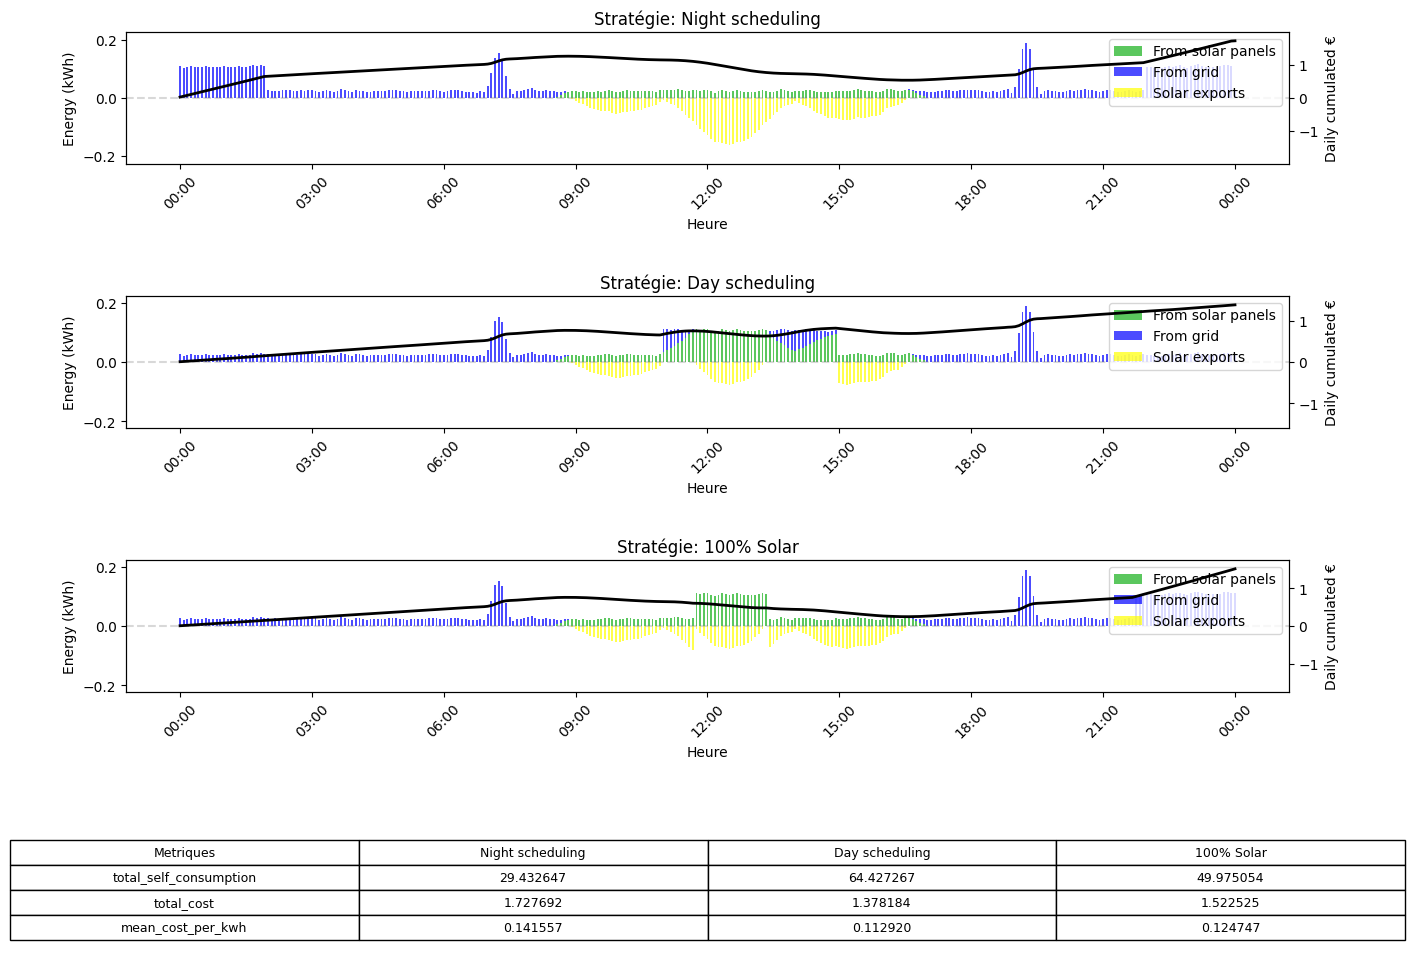

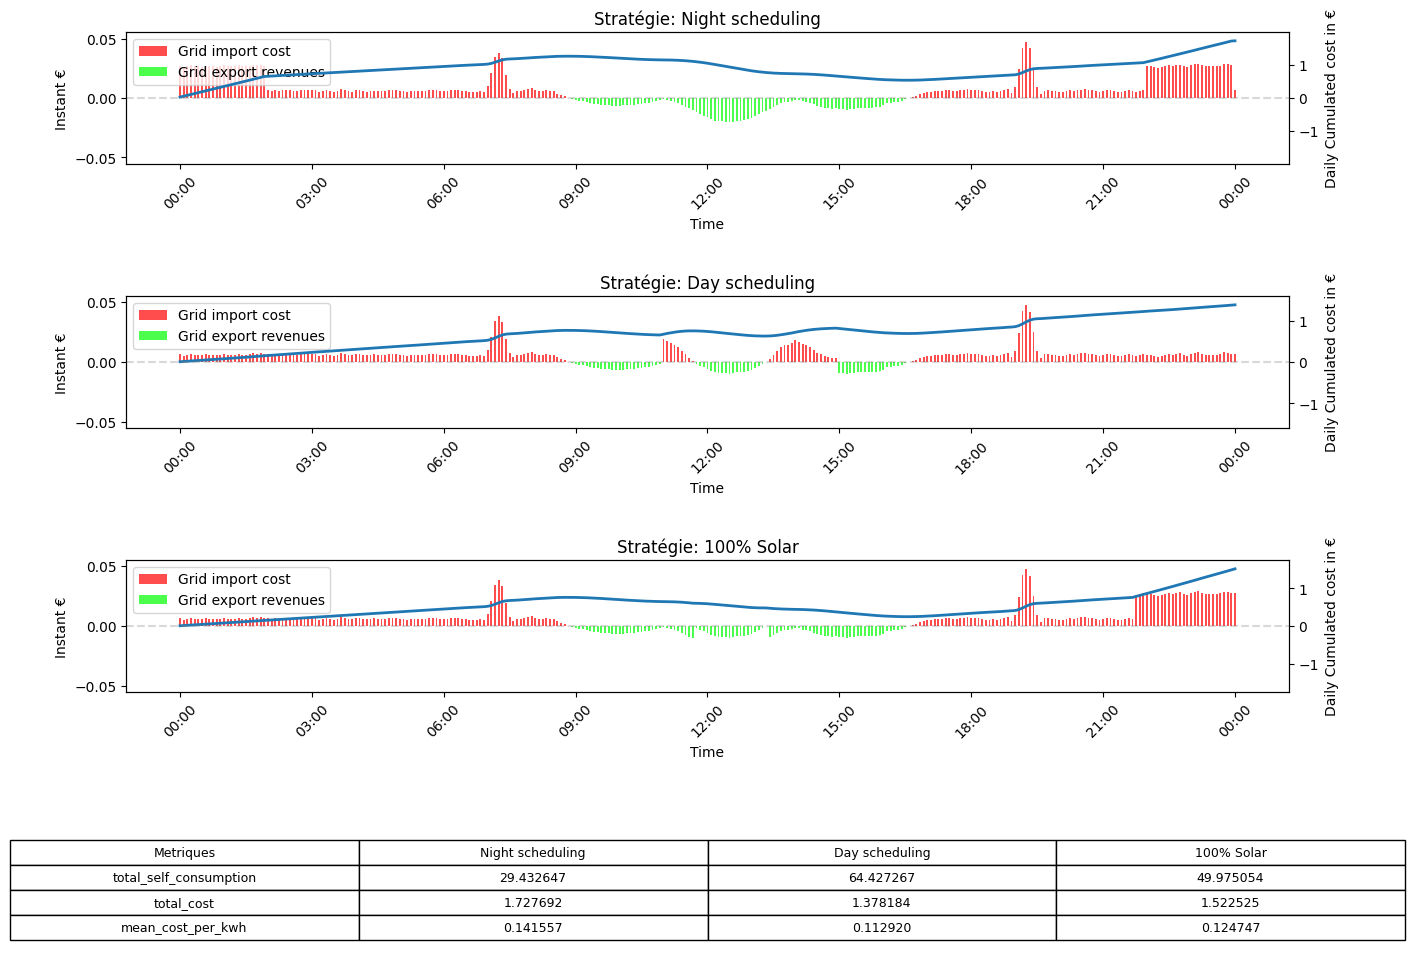

In [7]:
## Display results
# Create figure for plotting
#strategies_to_compare = ["Night scheduling", "Day scheduling", "100% Solar", "Max. Solar.","Optimiz"]
strategies_to_compare = ["Night scheduling", "Day scheduling", "100% Solar"]
#metrics_to_display = ['total_grid_imports','total_grid_exports', 'total_production','total_self_consumption','total_cost','mean_cost_per_kwh', 'cet_total_cost','cet_solar_share']
metrics_to_display = ['total_self_consumption','total_cost','mean_cost_per_kwh']
SolarOptimizationVisualizer.plot_all_results(scenario, results, metrics_to_display, strategies_to_compare, display_type = VisualizationType.RAW )
SolarOptimizationVisualizer.plot_all_results(scenario, results, metrics_to_display, strategies_to_compare, display_type = VisualizationType.DELTA )
SolarOptimizationVisualizer.plot_all_results(scenario, results, metrics_to_display, strategies_to_compare, display_type = VisualizationType.COST )
plt.show()